# Exercise: Chicago Food Deserts

#### Summary

Looking at census tracts in Chicago to find food deserts - places without a good source of food.

#### Data Source(s)

All data from the city of Chicago

#### Files

- `Boundaries - Census Tracts - 2010.zip`, census tracts in Chicago from [here](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik)
- `Grocery_Stores_-_2013.csv`, grocery stores in Chicago from [here](https://data.cityofchicago.org/Community-Economic-Development/Grocery-Stores-2013/53t8-wyrc)

#### Data dictionary

Visit the "here" links above. Scroll down a little and click 'Show All' to see every column.

#### Skills

- Opening shapefiles
- Opening CSV files as geography
- Reprojecting
- Buffers

## Import what you'll need to do geographic work

Probably pandas, geopandas, and the shapely thing that lets you make Points

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
from shapely.geometry import Point

In [3]:
%matplotlib inline

## Read in the census tract boundaries for Chicago

Give it a name that makes sense, like `tracts`.

In [5]:
tracts = gpd.read_file('Boundaries - Census Tracts - 2010/geo_export_085dcd7b-113c-4a6d-8d43-5926de1dcc5b.shp')

In [17]:
#shp file for the shapes
#shx files contains geo-locational meta info
#dbj file contains some data
#prj file contains index info

### Confirm that you have 10 columns and 801 rows

In [7]:
tracts.shape

(801, 10)

### What does the data look like? What columns do you have?

In [9]:
tracts.head(5)

,commarea,commarea_n,countyfp10,geoid10,geometry,name10,namelsad10,notes,statefp10,tractce10
0,44,44.0,031,17031842400,POLYGON ((-87.62404799998049 41.73021699998396...,8424,Census Tract 8424,,17,842400
1,59,59.0,031,17031840300,"POLYGON ((-87.6860799999848 41.82295600001154,...",8403,Census Tract 8403,,17,840300
2,34,34.0,031,17031841100,"POLYGON ((-87.62934700001182 41.8527970000265,...",8411,Census Tract 8411,,17,841100
3,31,31.0,031,17031841200,POLYGON ((-87.68813499997718 41.85569099999095...,8412,Census Tract 8412,,17,841200
4,28,28.0,031,17031838200,"POLYGON ((-87.66781999997529 41.8741839999791,...",8382,Census Tract 8382,,17,838200


In [8]:
tracts.dtypes

commarea       object
commarea_n    float64
countyfp10     object
geoid10        object
geometry       object
name10         object
namelsad10     object
notes          object
statefp10      object
tractce10      object
dtype: object

### Plot it to see if it looks okay

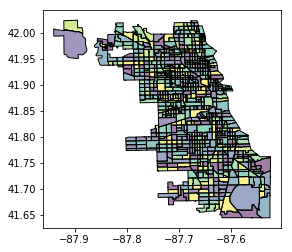

In [10]:
tracts.plot()

## Read in the grocery store data for Chicago

Note that you'll be reading in a **csv, not a shapefile**. This takes an extra conversion step to turn it into a GeoDataFrame - hopefully you have an easy cut-and-paste from last class!

Give it a name that makes sense, like `grocery_stores`.

In [11]:
df_grocery_stores = pd.read_csv('Grocery_Stores_-_2013.csv')

In [18]:
df_grocery_stores.head(1)

,STORE NAME,LICENSE ID,ACCOUNT NUMBER,SQUARE FEET,BUFFER SIZE,ADDRESS,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,WARD,CENSUS TRACT,CENSUS BLOCK,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry
0,200 LIQUORS,48663.0,17055.0,5000.0,B,204 E 47TH ST,60653,GRAND BOULEVARD,38,3,17031381500,1.703138e+14,1.178462e+06,1.873949e+06,41.809424,-87.620952,"(41.8094238941, -87.6209518020)",POINT (-87.62095180200001 41.8094238941)


In [19]:
points = df_grocery_stores.apply(lambda x: Point(x.LONGITUDE, x.LATITUDE), axis=1)

In [20]:
points

0      POINT (-87.62095180200001 41.8094238941)
1          POINT (-87.6436497585 41.9486836744)
2      POINT (-87.72366494190001 41.8139143113)
3      POINT (-87.70411882229999 41.8080472717)
4      POINT (-87.76861213059999 41.9311354035)
5          POINT (-87.6444202389 41.7596745819)
6      POINT (-87.65818905290001 41.7503211206)
7      POINT (-87.75318234870001 41.9021664421)
8          POINT (-87.6247659397 41.7678312792)
9      POINT (-87.77519268090001 41.9205964582)
10     POINT (-87.77519268090001 41.9205964582)
11           POINT (-87.648746265 41.929209817)
12         POINT (-87.6573078048 41.7648941814)
13         POINT (-87.7553096457 41.8910335471)
14     POINT (-87.78605436860001 41.9375646502)
15     POINT (-87.66027799290001 41.9952114602)
16     POINT (-87.60564802530001 41.7743058812)
17     POINT (-87.70398627180001 41.8034457131)
18         POINT (-87.7049944648 41.8381141517)
19     POINT (-87.65462784299999 41.9144237141)
20         POINT (-87.6634041558 41.7549

In [21]:
grocery_stores = gpd.GeoDataFrame(df_grocery_stores, geometry=points)

In [22]:
grocery_stores.head(5)

,STORE NAME,LICENSE ID,ACCOUNT NUMBER,SQUARE FEET,BUFFER SIZE,ADDRESS,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,WARD,CENSUS TRACT,CENSUS BLOCK,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry
0,200 LIQUORS,48663.0,17055.0,5000.0,B,204 E 47TH ST,60653,GRAND BOULEVARD,38,3,17031381500,1.703138e+14,1.178462e+06,1.873949e+06,41.809424,-87.620952,"(41.8094238941, -87.6209518020)",POINT (-87.62095180200001 41.8094238941)
1,3600 COMMISSARY,24279.0,9830.0,3800.0,B,3600 N LAKE SHORE DR,60613,LAKE VIEW,6,46,17031060900,1.703106e+14,1.171866e+06,1.924645e+06,41.948684,-87.643650,"(41.9486836744, -87.6436497585)",POINT (-87.6436497585 41.9486836744)
2,4343 PETES FRESH MARKET,1336669.0,260303.0,57000.0,A,4343 S PULASKI RD,60632,ARCHER HEIGHTS,57,14,17031570100,1.703157e+14,1.150448e+06,1.875370e+06,41.813914,-87.723665,"(41.8139143113, -87.7236649419)",POINT (-87.72366494190001 41.8139143113)
3,4700 PETE'S FRESH MARKET,1243125.0,245519.0,45000.0,A,4700 S KEDZIE AVE,60632,BRIGHTON PARK,58,14,17031842800,1.703184e+14,1.155792e+06,1.873271e+06,41.808047,-87.704119,"(41.8080472717, -87.7041188223)",POINT (-87.70411882229999 41.8080472717)
4,5659 W. DIVERSEY,1575023.0,277375.0,4000.0,B,5659 W DIVERSEY AVE,60639,BELMONT CRAGIN,19,30,17031190602,1.703119e+14,1.137914e+06,1.918002e+06,41.931135,-87.768612,"(41.9311354035, -87.7686121306)",POINT (-87.76861213059999 41.9311354035)


In [23]:
#this to initialize the coordinate system
grocery_stores.crs = {'init': 'epsg:4326'}

### Confirm that you have 506 rows

In [15]:
grocery_stores.shape

(506, 18)

### Plot to make sure it looks okay

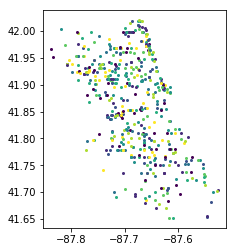

In [16]:
grocery_stores.plot()

## Plot the grocery stores on top of the census tracts.

- Make it look somewhat nice, with a nice grey background and grocery stores that stand out.
- Be sure the CRSes are the same!

(-87.96107629997519, -87.50283170000732, 41.62530410001137, 42.042905899965575)

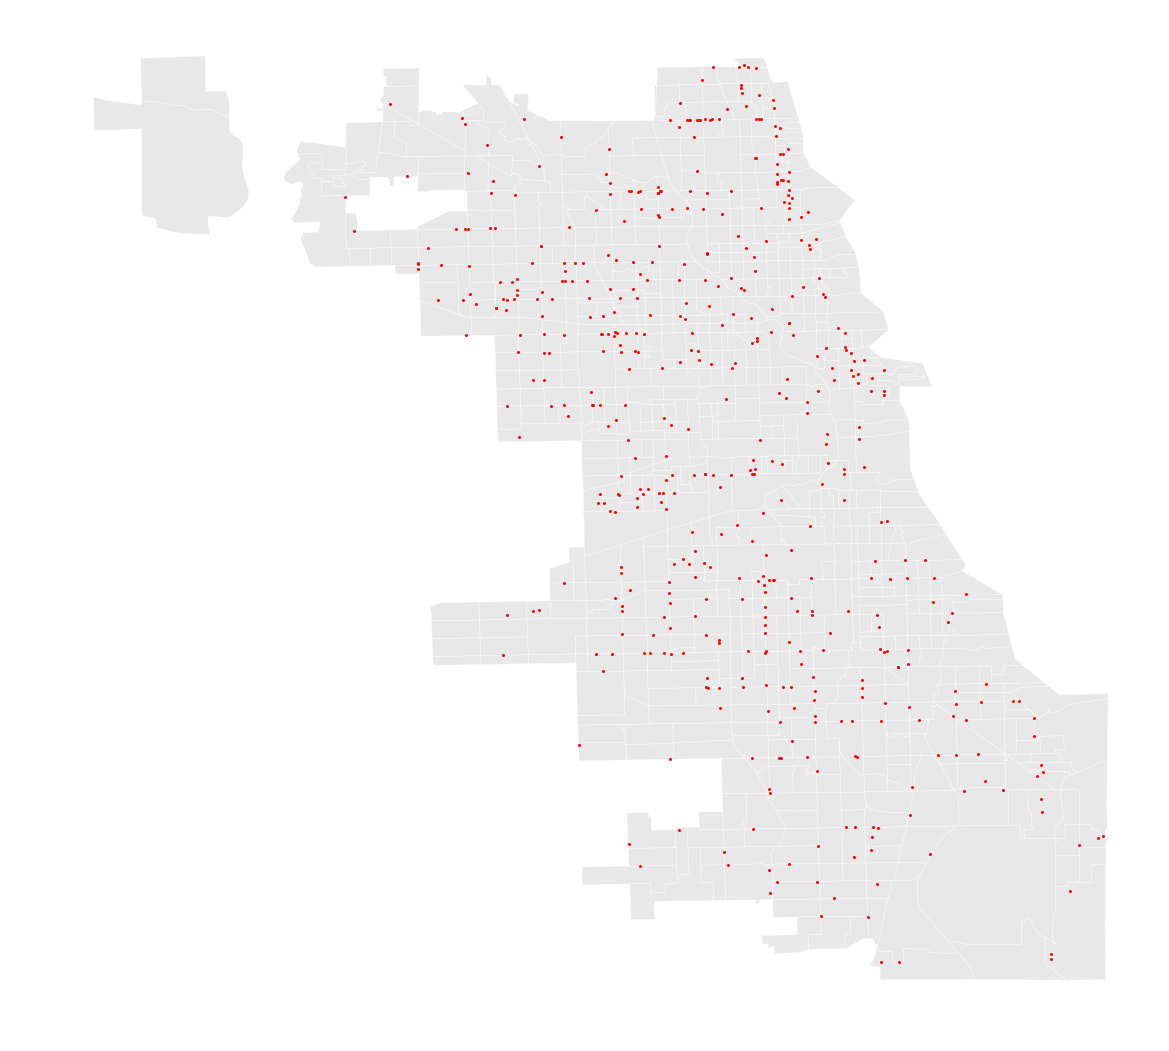

In [33]:
ax = tracts.plot(color='lightgray', linewidth=0.25, edgecolor='white', figsize=(20,20))
grocery_stores.plot(ax=ax, color='red', markeredgewidth=0, markersize=3)
ax.axis('off')

## Which census tracts don't have a grocery store?

Just in case you forgot, `~` means "does NOT" in pandas. So for example, you might think the following code means **"plot all of the tracts that do NOT contain a grocery store"**.

```pyhon
tracts[~tracts.contains(grocery_stores)].plot()
```

Try it. It doesn't work.

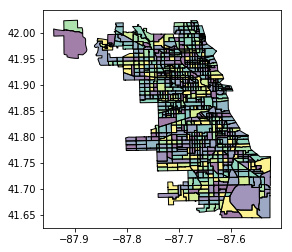

In [29]:
tracts[~tracts.contains(grocery_stores)].plot()

It actually means **"plot all of the tracts that do not contain *every* grocery store"**. Since no census tract contains every grocery store, it won't work.

## Geographic relationships

There are [a lot of other spatial relationships](http://geopandas.org/reference.html), such as:

* **contains:** each object’s interior contains the boundary and interior of the other object and their boundaries do not touch at all (IS TOTALLY INSIDE OF THE OTHER OBJECT)
* **intersects:** the boundary and interior of each object intersects in any way with those of the other (SOME INTERIOR HAS TO OVERLAP)
* **touches:** if the objects have at least one point in common and their interiors do not intersect with any part of the other (BOUNDARY TOUCHES BUT NOT INTERIOR)
* **within:** if each object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior) (SAME AS CONTAINS, ONLY OPPOSITE DIRECTION)
* **disjoint:** the boundary and interior of each object does not intersect at all with those of the other (NO TOUCH AT ALL)
* **crosses:** the interior of each object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other. (CROSS)

Rewrite those to make sense.

### Plot the census tracts that do not contain ANY grocery stores

In [31]:
tracts.disjoint(grocery_stores).head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

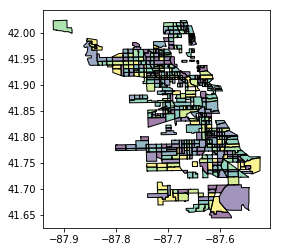

In [34]:
tracts[tracts.disjoint(grocery_stores)].plot() #actually this doesn't work...

**But wait: that's not what we're doing!** We're interested in (kind of) people who are **half a mile** from a grocery store.

## Which census tracts are far from a grocery store? Introducing buffer!

`.buffer()` draws a buffer around a point, line, or shape. You can use it to say, "show me things within XXX distance of YYY". Try to take the grocery stores, draw a half-mile buffer around them, and plot it.

**It won't look pretty.**

In [36]:
grocery_stores.buffer(.5).head()

0    POLYGON ((-87.12095180200001 41.8094238941, -8...
1    POLYGON ((-87.1436497585 41.9486836744, -87.14...
2    POLYGON ((-87.22366494190001 41.8139143113, -8...
3    POLYGON ((-87.20411882229999 41.8080472717, -8...
4    POLYGON ((-87.26861213059999 41.9311354035, -8...
dtype: object

## That... doesn't work.

Unfortunately `.buffer` uses the units of the current CRS, and the current CRS is **EPSG:4326**. What units is it using? You'll need to ask Google.

In [37]:
grocery_stores.crs

{'init': 'epsg:4326'}

## Reprojecting to be able to use meters

Luckily we can use Mercator, the projection we should all dislike because it looks so ugly, to get units of meters.

You can use the epsg of `3395` if you'd like, or use `{'proj': 'merc'}` - either one is fine.

**How many meters is half a mile?**

- Reproject grocery stores to be Mercator (permanently)
- Create a half-mile buffer, 
- and map it.

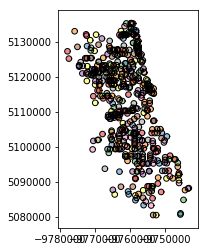

In [39]:
#now doing it in meters
grocery_stores.to_crs({'proj': 'merc'}).buffer(800).plot()

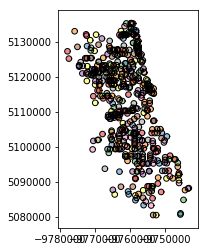

In [40]:
#same code
grocery_stores.to_crs(epsg=3395).buffer(800).plot()

In [41]:
#re-projecting both datasets
grocery_stores = grocery_stores.to_crs(epsg=3395)
tracts = tracts.to_crs(epsg=3395)

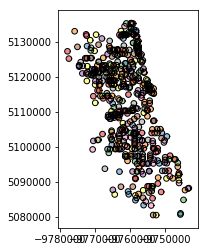

In [43]:
grocery_stores.buffer(800).plot()

## Finding our food deserts

First, make a map of **every census tract** and **every grocery store**, along with a **buffer zone** around the grocery stores. You'll need to make sure they're in the **same projection**, and you might want to save the buffer to a new variable (`buffered_grocery_stores`, maybe?). You'll also probably want the buffer zone to be plotted with `alpha=0.5` or something like that to make it a bit transparent.

Actually, just **permanently reproject `tracts` to be Mercator**.

In [48]:
#Create a bufer of 800m around grocery stores -> returns a geoseries
buffered_grocery_stores = grocery_stores.buffer(800)

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

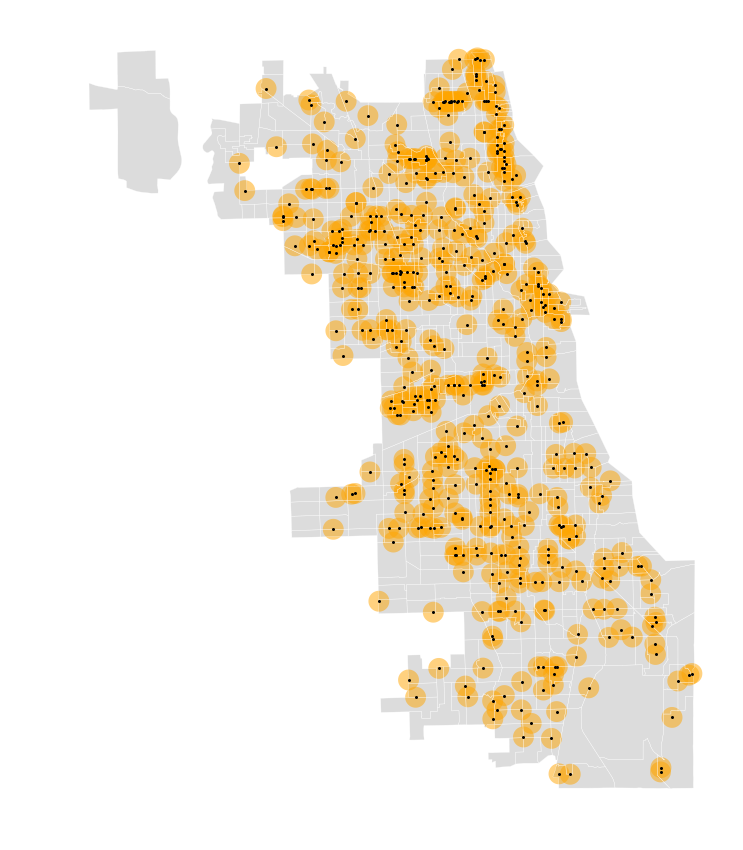

In [53]:
ax = tracts.plot(color='#BBBBBB', linewidth=0.25, edgecolor='white', figsize=(15,15))
grocery_stores.plot(color='black', ax=ax, markersize=3, markeredgewidth=0)
buffered_grocery_stores.plot(color='orange', ax=ax, linewidth=0)
ax.axis('off')


## Now add to that the census tracts that do NOT touch one of our buffers.

It... doesn't seem to look right, once again.

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

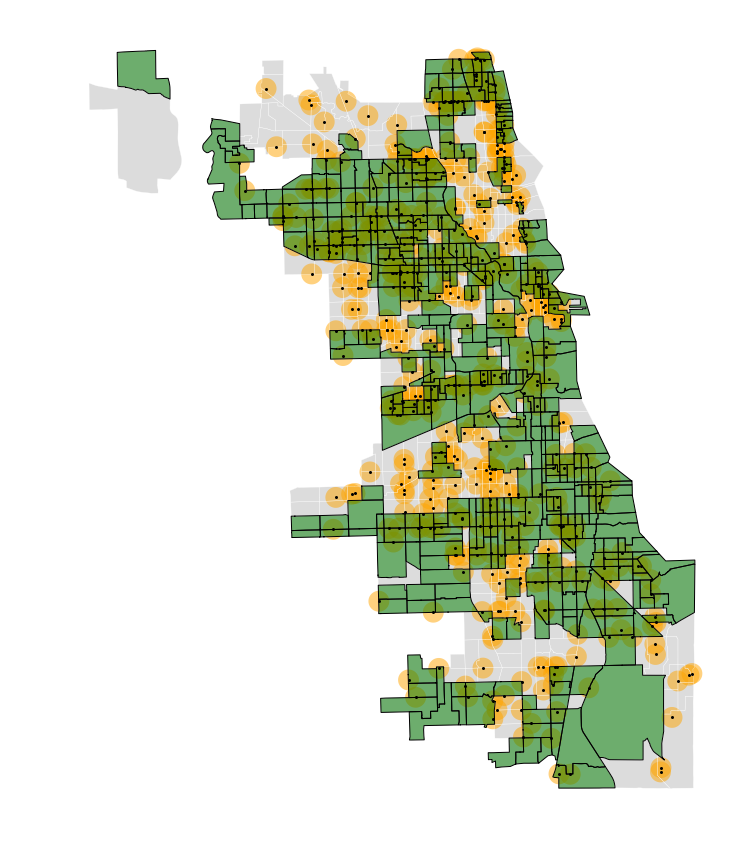

In [54]:
ax = tracts.plot(color='#BBBBBB', linewidth=0.25, edgecolor='white', figsize=(15,15))
grocery_stores.plot(color='black', ax=ax, markersize=3, markeredgewidth=0)
buffered_grocery_stores.plot(color='orange', ax=ax, linewidth=0)
tracts[tracts.disjoint(buffered_grocery_stores)].plot(ax=ax, color='green')
ax.axis('off')


## The sad way of doing it

If you want to do this right, we need to do it **one tract at a time**, and say "hey, do you intersect with any buffers?"

First, let's pull out a single tract.

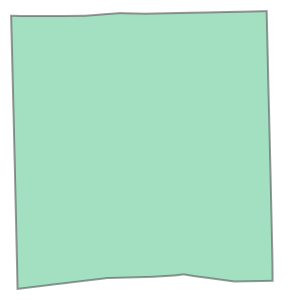

In [55]:
tract = tracts.loc[99]
tract.geometry

Then, ask it which grocery store buffers it interacts with. **I'm using `.head()` so I don't have to see a big long list**.

In [56]:
buffered_grocery_stores.intersects(tract.geometry).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

Instead of a big long list of `True` and `False` for every single comparison, I can say **"hey, were any of those True?"**

In [57]:
buffered_grocery_stores.intersects(tract.geometry).any()

True

### Using .intersects and .any() with a .apply

So now we get to the real ugly part: go through every single tract, see if it intersects, and map accordingly.

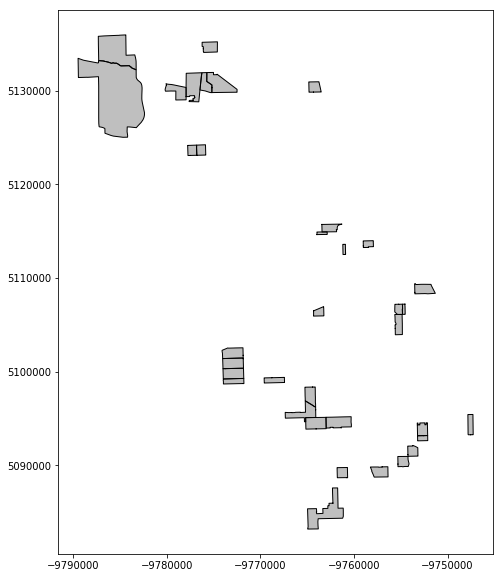

In [60]:
# returns YES if the row intersects with ANY of the grocery stores
def does_intersect(row):
    return buffered_grocery_stores.intersects(row.geometry).any()

# Go through every row, testing for an intersection
# notice the ~ to make it negative
tracts[~tracts.apply(does_intersect, axis=1)].plot(figsize=(10,10), color='grey')

## Stop crying, please: we can fix this with `.unary_union`

The problem right now is that we're comparing **every single tract** to **every single buffer**. But what if there was only **one buffer** instead of a few hundred?

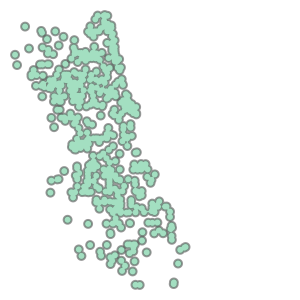

In [61]:
buffered_grocery_stores.unary_union

In [64]:
type(buffered_grocery_stores.unary_union)

shapely.geometry.multipolygon.MultiPolygon

Look at that!!!! **`.unary_union`** takes a bunch of polygons or whatever and turns them into ONE NICE SIMPLE POYLGON.

And we can use that with our `.intersects` now, really super easily.

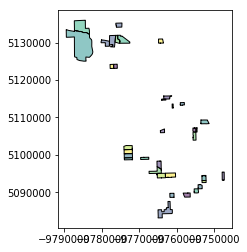

In [62]:
tracts[~tracts.intersects(buffered_grocery_stores.unary_union)].plot()
#same code:
tracts[tracts.disjoint(buffered_grocery_stores.unary_union)].plot()

## Plot that on top of the map you made before, with all of the circles

You'll want to do it AFTER you plot all of the tracts but BEFORE you plot the grocery stores.

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

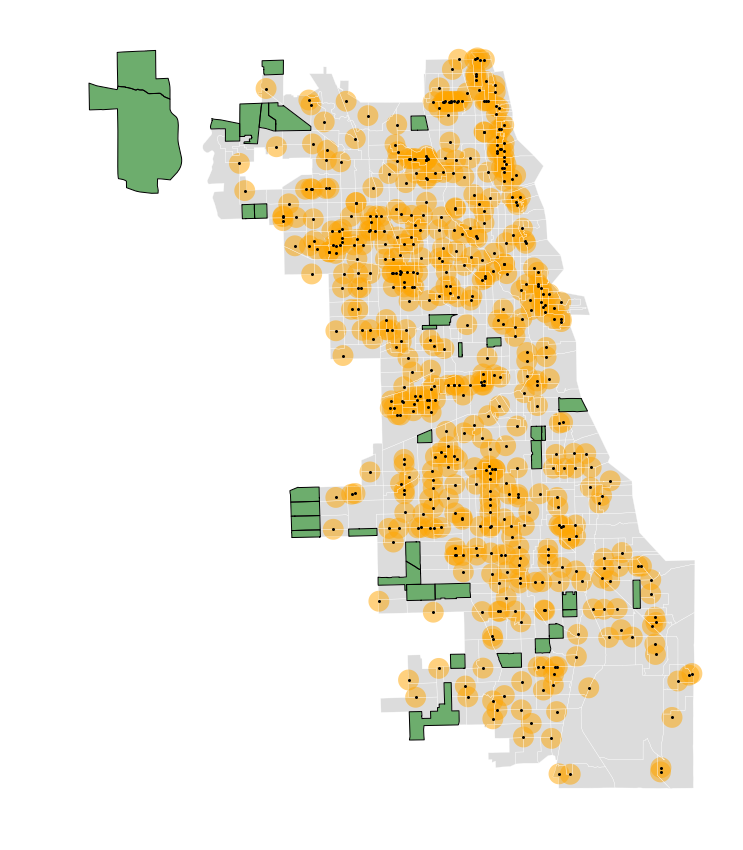

In [68]:
ax = tracts.plot(color='#BBBBBB', linewidth=0.25, edgecolor='white', figsize=(15,15))
grocery_stores.plot(color='black', ax=ax, markersize=3, markeredgewidth=0)
buffered_grocery_stores.plot(color='orange', ax=ax, linewidth=0)
tracts[tracts.disjoint(buffered_grocery_stores.unary_union)].plot(ax=ax, color='green')
ax.axis('off')

## Okay actually though I have bad news

Usually when you do these comparisons, you aren't saying "does ANY part of this census tract touch a buffer zone," you're saying "does the CENTER of this census tract touch a buffer zone?"

**How do we find the center of the census tracts?** It isn't terrible, really.

## Getting the center of the census tracts

The important thing is that they aren't called centers, they're called **centroids**.

And you find them by just typing....... `centroid`.

In [71]:
tracts.centroid.head(5)

0    POINT (-9754931.488121599 5094025.722640746)
1    POINT (-9760702.447700242 5107355.596141564)
2    POINT (-9755494.456942635 5110170.881676532)
3    POINT (-9760864.979118472 5110849.228339726)
4    POINT (-9759945.189688148 5113061.217586301)
dtype: object

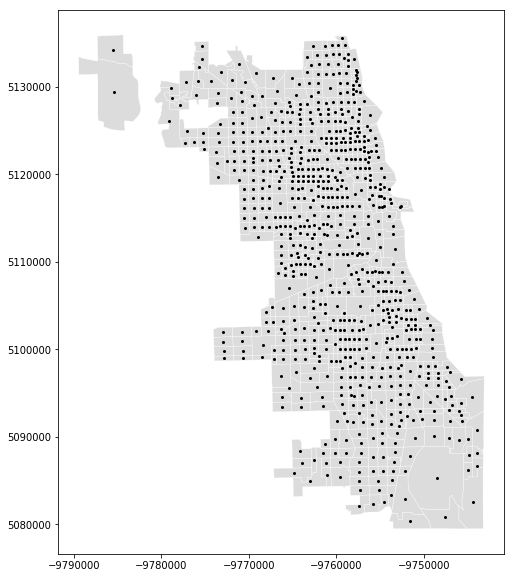

In [73]:
ax = tracts.plot(color='#BBBBBB', linewidth=0.25, edgecolor='white', figsize=(10,10))
tracts.centroid.plot(ax=ax, color='black')

## Which centroids aren't inside of a buffer?

Well, we do the exact same as before, but we ask something like "which centroids are NOT within the grocery store buffer zone?", and then we feed that right back to `tracts`.

In [75]:
tracts.centroid.within(buffered_grocery_stores.unary_union).head(5)

0    False
1     True
2     True
3     True
4    False
dtype: bool

## And then we just map it all over again

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

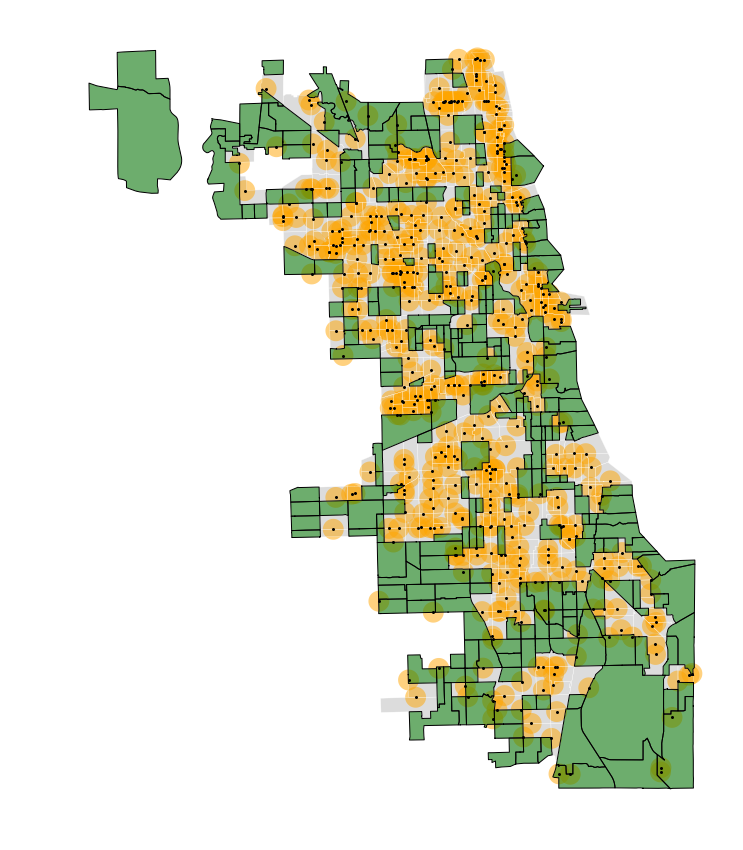

In [77]:
ax = tracts.plot(color='#BBBBBB', linewidth=0.25, edgecolor='white', figsize=(15,15))
grocery_stores.plot(color='black', ax=ax, markersize=3, markeredgewidth=0)
buffered_grocery_stores.plot(color='orange', ax=ax, linewidth=0)
tracts[~tracts.centroid.within(buffered_grocery_stores.unary_union)].plot(ax=ax, color='green')
ax.axis('off')

## And if we want to get technical and make your brain hurt more

There are two kinds of grocery stores, A and B, and B should have a half-mile radius and A should have a one-mile radius.

In [78]:
def make_fancy_buffer(row):
    if row['BUFFER SIZE'] == 'A':
        return row.geometry.buffer(1600)
    elif row['BUFFER SIZE'] == 'B':
        return row.geometry.buffer(800)
    
fancy_buffer = grocery_stores.apply(make_fancy_buffer, axis=1)

# We need to convert it into a GeoSeries because pandas thinks its a normal series
fancy_buffer = gpd.GeoSeries(fancy_buffer)

### Make the many-layered map again, but this time use `fancy_buffer` instead of `grocery_stores_buffer`

In [80]:
fancy_buffer.head(5)

0    POLYGON ((-9753119.737420607 5103981.778572024...
1    POLYGON ((-9755646.462380236 5124725.204320104...
2    POLYGON ((-9763753.711852053 5104649.938418441...
3    POLYGON ((-9761577.847771194 5103776.950972501...
4    POLYGON ((-9769557.210010724 5122108.793547577...
dtype: object

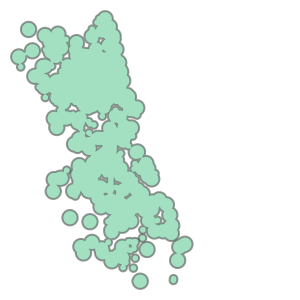

In [87]:
fancy_buffer.unary_union

(-9791850.8051522169,
 -9739330.4497897606,
 5076056.4987035347,
 5139754.9700630903)

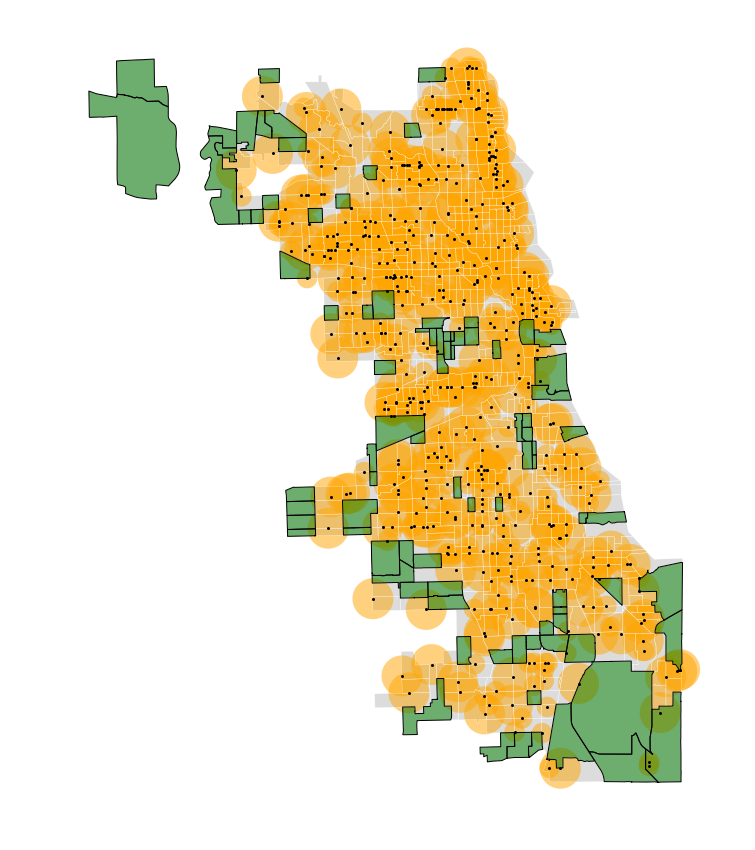

In [88]:
ax = tracts.plot(color='#BBBBBB', linewidth=0.25, edgecolor='white', figsize=(15,15))
grocery_stores.plot(color='black', ax=ax, markersize=3, markeredgewidth=0)
fancy_buffer.plot(color='orange', ax=ax, linewidth=0)
tracts[~tracts.centroid.within(fancy_buffer.unary_union)].plot(ax=ax, color='green')
ax.axis('off')